In [ ]:
import zipfile
with zipfile.ZipFile("/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/Five_Cats_Without_Preprocessing_Manual_Adding_Images_Folder_Whole_Slide.zip","r") as zip_ref:
    zip_ref.extractall("/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/Five_Cats_Without_Preprocessing_Manual_Adding_Images_Folder_Whole_Slide")
!nvidia-smi

In [ ]:
import zipfile
with zipfile.ZipFile("/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_duc.zip","r") as zip_ref:
    zip_ref.extractall("/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_duc")


In [1]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
import shutil
from sklearn import model_selection
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from CSRNet_VGG_Criss_Cross import *
#from Efficient_Net import EfficientNet_b0
from Ensemble_Learning import *

CC Moudle
Loaded pretrained weights for efficientnet-b1
Loaded pretrained weights for efficientnet-b0
Loaded pretrained weights for efficientnet-b3
Loaded pretrained weights for efficientnet-b5


In [ ]:
WD = '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/dataset_NormReinhard_5_Classes/dataset_NormReinhard_5_Classes/'
Cat2_Folder = WD + 'category_2_NormReinhard_bg_crops_dataset'
Cat3_Folder = WD + 'category_3_NormReinhard_bg_crops_dataset'
Cat4_Folder = WD + 'category_4_NormReinhard_bg_crops_dataset'
Cat5_Folder = WD + 'category_5_NormReinhard_bg_crops_dataset'
Cat6_Folder = WD + 'category_6_NormReinhard_bg_crops_dataset'

In [ ]:
cat2_images = os.listdir(Cat2_Folder)
cat3_images = os.listdir(Cat3_Folder)
cat4_images = os.listdir(Cat4_Folder)
cat5_images = os.listdir(Cat5_Folder)
cat6_images = os.listdir(Cat6_Folder)
cat2_images[:4]

In [ ]:
len(cat2_images),len(cat3_images),len(cat4_images),len(cat5_images),len(cat6_images)

In [ ]:
plt.imshow(Image.open(os.path.join(Cat2_Folder,cat2_images[3])))

In [ ]:
Pytorch_Dataset = '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset'

In [ ]:
# Generate folder Structure
try:
    os.makedirs(os.path.join(Pytorch_Dataset, 'train/cat2'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'train/cat3'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'train/cat4'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'train/cat5'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'train/cat6'))
    
    os.makedirs(os.path.join(Pytorch_Dataset, 'val/cat2'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'val/cat3'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'val/cat4'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'val/cat5'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'val/cat6'))
    
    os.makedirs(os.path.join(Pytorch_Dataset, 'test/cat2'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'test/cat3'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'test/cat4'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'test/cat5'))
    os.makedirs(os.path.join(Pytorch_Dataset, 'test/cat6'))
    
except:
    print('Already Exist')
    pass

In [ ]:
all_images=[os.path.join(Cat2_Folder,i) for i in cat2_images] + [os.path.join(Cat3_Folder,i) for i in cat3_images] + [os.path.join(Cat4_Folder,i) for i in cat4_images] + [os.path.join(Cat5_Folder,i) for i in cat5_images] + [os.path.join(Cat6_Folder,i) for i in cat6_images]
all_cats = ['cat2']*len(cat2_images) + ['cat3']*len(cat3_images) + ['cat4']*len(cat4_images) + ['cat5']*len(cat5_images) + ['cat6']*len(cat6_images) 
# Split and copy/move images to these folders
# Train/Val/Test ratio 7/2/1
x_train, x_val, y_train,y_val = model_selection.train_test_split(all_images, all_cats, test_size=3/10)
#x_val, x_test, y_val, y_test = model_selection.train_test_split(x_val,y_val, test_size=1/3)
len(x_train), len(x_val)

In [ ]:
for img,label in zip(x_train, y_train):
    if '2' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'train/cat2'))
    elif '3' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'train/cat3'))
    elif '4' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'train/cat4'))
    elif '5' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'train/cat5'))
    else:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'train/cat6'))
        
for img,label in zip(x_val, y_val):
    if '2' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'val/cat2'))
    elif '3' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'val/cat3'))
    elif '4' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'val/cat4'))
    elif '5' in label:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'val/cat5'))
    else:
        shutil.copy2(img,os.path.join(Pytorch_Dataset, 'val/cat6')) 
        
# for img,label in zip(x_test, y_test):
#     if '2' in label:
#         shutil.copy2(img,os.path.join(Pytorch_Dataset, 'test/cat2'))
#     elif '3' in label:
#         shutil.copy2(img,os.path.join(Pytorch_Dataset, 'test/cat3'))
#     elif '4' in label:
#         shutil.copy2(img,os.path.join(Pytorch_Dataset, 'test/cat4'))
#     elif '5' in label:
#         shutil.copy2(img,os.path.join(Pytorch_Dataset, 'test/cat5'))
#     else:
#         shutil.copy2(img,os.path.join(Pytorch_Dataset, 'test/cat6'))         

In [2]:
# Data augmentation and normalization for training
# Just normalization for validation
# TODO: augment with other different transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        # transforms.RandomResizedCrop(),
        transforms.RandomRotation(5),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        # transforms.RandomErasing(0.05),
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#data_dir = '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset'
#data_dir = '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_01'
data_dir = '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_duc/pytorch_dataset_duc/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=64,
                                             shuffle=True, num_workers=10)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    
    epoch_accs = []
    epoch_losses = []
    
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                #labels = labels -1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            epoch_accs.append(epoch_acc)
            epoch_losses.append(epoch_loss)
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    metadata = {
        "model": model,
        "epoch_accuracy": epoch_accs,
        "epoch_loss": epoch_losses}
    return metadata

In [4]:
from efficientnet_pytorch import EfficientNet
# model=EfficientNet.from_pretrained('efficientnet-b0')
# model.extract_endpoints
class EfficientNet_b0(nn.Module):
    def __init__(self):
        super(EfficientNet_b0, self).__init__()
        self.model = EfficientNet.from_pretrained('efficientnet-b0')
        self.CAMM = CAM_Module_01(1280)
        self.classifier_layer = nn.Sequential(
            nn.Linear(1280, 1200),
            #nn.Linear(1200, 1000),
            #nn.Linear(1000, 800),
            #nn.Linear(800, 600),
            #nn.Linear(600, 512),
            #nn.BatchNorm1d(512),
            nn.Dropout(0.6),
            nn.Linear(1200, 512),
            nn.Linear(512, 256),
            nn.Linear(256, 104),
            nn.Linear(104, 5)
        )

    def forward(self, inputs):
        x = self.model.extract_features(inputs)
        #print(x.shape)
        x1 = self.CAMM(x)
        x2 = self.CAMM(x)

        x = x1 + x2
        # Pooling and final linear layer
        x = self.model._avg_pooling(x)
        x = x.flatten(start_dim=1)
        x = self.model._dropout(x)
        x = self.classifier_layer(x)
        return x

class CAM_Module_01(nn.Module):
    def __init__(self, in_dim):
        super(CAM_Module_01, self).__init__()
        self.chanel_in = in_dim


        self.gamma = nn.Parameter(torch.zeros(1))
        self.softmax  = nn.Softmax(dim=-1)
    def forward(self,x):
        m_batchsize, C, height, width = x.size()
        proj_query = x.view(m_batchsize, C, -1)
        proj_key = x.view(m_batchsize, C, -1).permute(0, 2, 1)
        energy = torch.bmm(proj_query, proj_key)
        energy_new = torch.max(energy, -1, keepdim=True)[0].expand_as(energy)-energy
        attention = self.softmax(energy_new)
        proj_value = x.view(m_batchsize, C, -1)

        out = torch.bmm(attention, proj_value)
        out = out.view(m_batchsize, C, height, width)

        out = self.gamma*out + x
        return out    
    
# if __name__ == "__main__":
#     inputs = torch.randn(1, 3, 224, 224)
#     model = EfficientNet_b0()
#     output = model(inputs)
#     print(output.shape)

In [5]:
# from efficientnet_pytorch import EfficientNet
# model_ft = EfficientNet.from_pretrained('efficientnet-b0', 5)

#model_ft = models.resnet50(pretrained=True)
#num_ftrs = model_ft.fc.in_features
# # Here the size of each output sample is set to 2.
# # Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
#model_ft.fc = nn.Linear(num_ftrs, 5)

#model_ft = DenseScaleNet()
model_ft = EfficientNet_b0()
#model_ft = Resnet50()
#model_ft = EfficientNet(1,1)
#model_ft = Ensemble_Net(efficient_net_b0,efficient_net_b1,resnet)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
#optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-3)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Loaded pretrained weights for efficientnet-b0


In [6]:
model_metadata = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=100)


Epoch 0/99
----------
train Loss: 1.3922 Acc: 0.4114
val Loss: 1.3945 Acc: 0.4801

Epoch 1/99
----------
train Loss: 1.2471 Acc: 0.5125
val Loss: 1.4828 Acc: 0.4778

Epoch 2/99
----------
train Loss: 1.1374 Acc: 0.5593
val Loss: 1.6797 Acc: 0.5441

Epoch 3/99
----------
train Loss: 1.0824 Acc: 0.5870
val Loss: 1.4056 Acc: 0.5072

Epoch 4/99
----------
train Loss: 0.9926 Acc: 0.6235
val Loss: 1.0137 Acc: 0.6503

Epoch 5/99
----------
train Loss: 0.9558 Acc: 0.6466
val Loss: 1.1771 Acc: 0.5955

Epoch 6/99
----------
train Loss: 0.8723 Acc: 0.6693
val Loss: 0.7556 Acc: 0.7207

Epoch 7/99
----------
train Loss: 0.7238 Acc: 0.7310
val Loss: 0.5296 Acc: 0.8015

Epoch 8/99
----------
train Loss: 0.6294 Acc: 0.7673
val Loss: 0.4745 Acc: 0.8223

Epoch 9/99
----------
train Loss: 0.5963 Acc: 0.7744
val Loss: 0.4391 Acc: 0.8390

Epoch 10/99
----------
train Loss: 0.5570 Acc: 0.7952
val Loss: 0.4173 Acc: 0.8402

Epoch 11/99
----------
train Loss: 0.5492 Acc: 0.7963
val Loss: 0.3953 Acc: 0.8529

Ep

In [ ]:
!nvidia-smi

In [7]:
train_acc, train_loss = [], []
val_acc, val_loss = [], []
for i, (acc, loss) in enumerate(zip(model_metadata['epoch_accuracy'], model_metadata['epoch_loss'])):
    if i % 2 == 0:
        train_acc.append(acc)
        train_loss.append(loss)
    else:
        val_acc.append(acc)
        val_loss.append(loss)

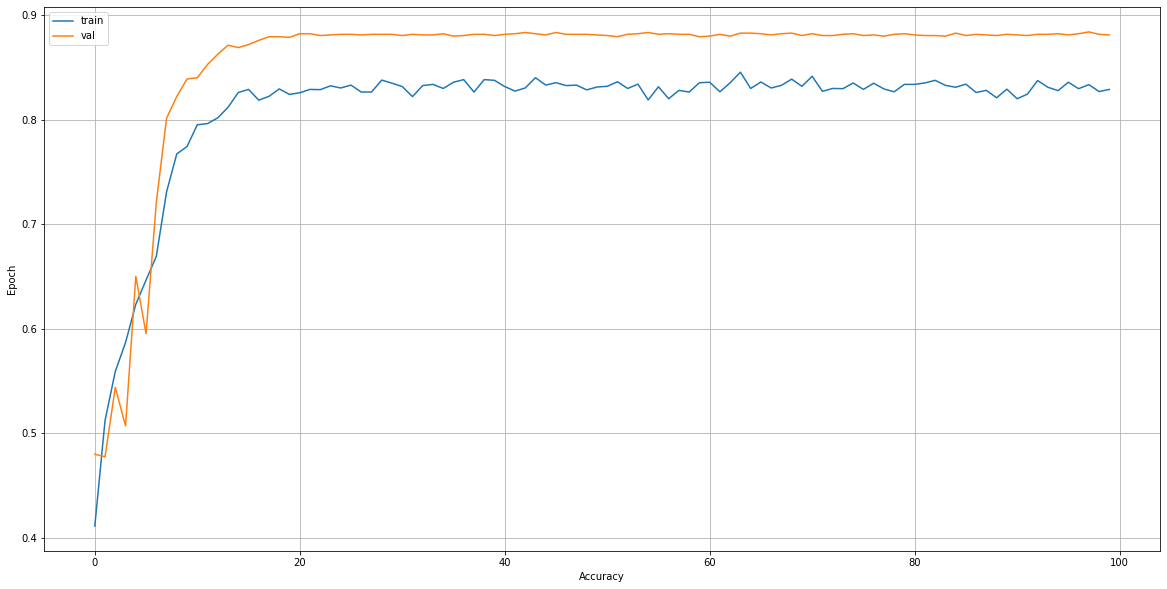

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_acc, label='train')
ax.plot(val_acc, label='val')
ax.set_xlabel("Accuracy")
ax.set_ylabel("Epoch")
plt.legend()
plt.grid()

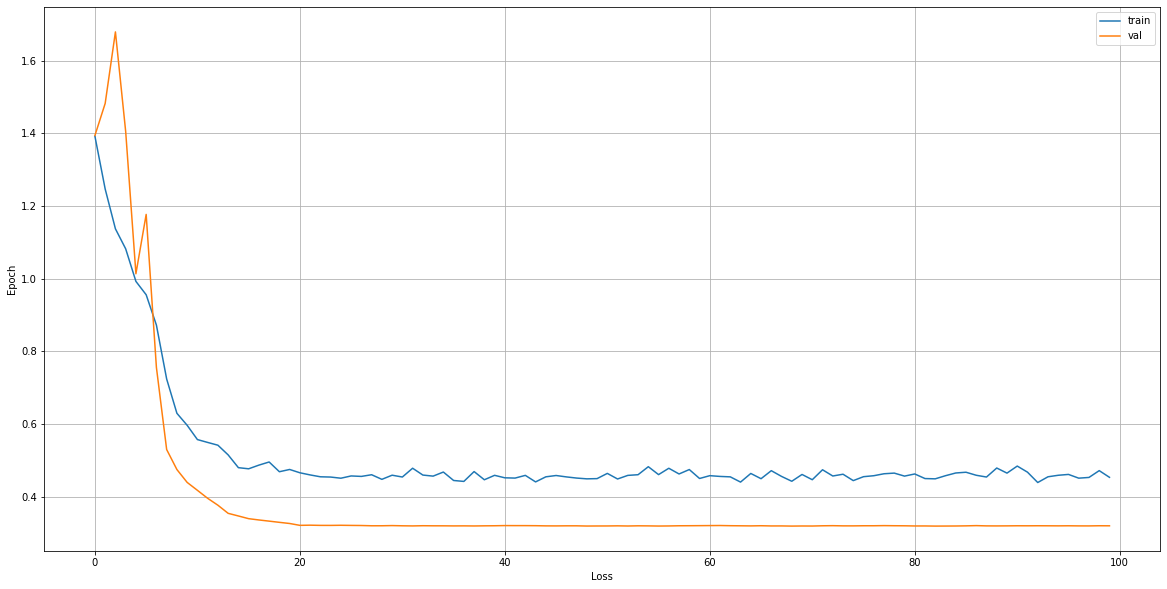

In [9]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(train_loss, label='train')
ax.plot(val_loss, label='val')
ax.set_xlabel("Loss")
ax.set_ylabel("Epoch")
plt.legend()
plt.grid()

In [10]:
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

val_dataset = datasets.ImageFolder('/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_duc/pytorch_dataset_duc/val/', val_transform)
dataloaders = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)
dataset_sizes = len(val_dataset)
class_names = val_dataset.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

running_loss = 0.0
running_corrects = 0
sm_probability = []
pred_labels = []
true_labels = []
prob_crit = nn.CrossEntropyLoss()

with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders):
        inputs = inputs.to(device)
        labels = labels.to(device)
        #labels = labels - 1
        outputs = model_metadata['model'](inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        loss = prob_crit(outputs, labels)
        
        p = torch.nn.functional.softmax(outputs, dim=1)
        numpy_p = p.cpu().numpy().tolist()
        numpy_labels = labels.cpu().numpy().tolist()
        
        sm_probability.extend(numpy_p)
        true_labels.extend(numpy_labels)
        pred_labels.extend(preds.cpu().numpy().tolist())
    sm_probability = np.array(sm_probability)
    true_labels = np.array(true_labels)

In [11]:
true_labels
sm_probability

array([[1.09029454e-04, 6.52553886e-03, 9.91666734e-01, 7.01401950e-05,
        1.62846304e-03],
       [1.30784574e-05, 2.70844903e-05, 9.99870181e-01, 7.00580713e-05,
        1.96166566e-05],
       [6.41948136e-05, 3.43087188e-04, 1.00151624e-03, 1.67699509e-05,
        9.98574495e-01],
       ...,
       [9.83837545e-01, 6.26693526e-03, 2.26609455e-03, 5.56135178e-03,
        2.06804811e-03],
       [2.05606939e-05, 1.87769692e-04, 1.90358653e-04, 6.44202065e-03,
        9.93159235e-01],
       [2.37882161e-03, 3.52490813e-01, 9.70513225e-02, 5.34946561e-01,
        1.31324157e-02]])

In [12]:
val_loss = running_loss / dataset_sizes
val_acc = running_corrects.double() / dataset_sizes
val_loss, val_acc
print(f'Loss: {val_loss} - Acc: {val_acc}')

Loss: 0.31924698700880083 - Acc: 0.8840161569532602


Confusion matrix
 [[264  14  10  10   1]
 [ 11 237   7  11   9]
 [  8   5 420  11  13]
 [  9  12   6 259  17]
 [  6  11  10  20 352]] 
---------------------------------



/home/mega/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()
/home/mega/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


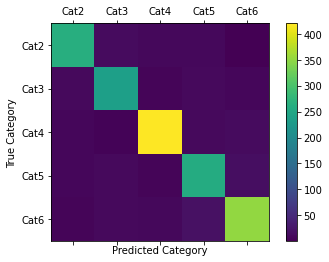

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       299
           1       0.85      0.86      0.86       275
           2       0.93      0.92      0.92       457
           3       0.83      0.85      0.84       303
           4       0.90      0.88      0.89       399

    accuracy                           0.88      1733
   macro avg       0.88      0.88      0.88      1733
weighted avg       0.88      0.88      0.88      1733

Confusion matrix
 [[264  14  10  10   1]
 [ 11 237   7  11   9]
 [  8   5 420  11  13]
 [  9  12   6 259  17]
 [  6  11  10  20 352]] 
---------------------------------



In [13]:
from ipykernel import kernelapp as app
#app.launch_new_instance()
y_true = true_labels
y_pred = pred_labels
labels_cat = ['Cat2', 'Cat3' , 'Cat4' , 'Cat5' , 'Cat6']
cm = confusion_matrix(y_true, y_pred)

print('Confusion matrix\n', cm, '\n---------------------------------\n')


fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
#plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels_cat) 
ax.set_yticklabels([''] + labels_cat) 
plt.xlabel('Predicted Category') 
plt.ylabel('True Category') 
plt.show()



#plt.matshow(cm)
#plt.colorbar()
#plt.show()

print(classification_report(y_true, y_pred))
print('Confusion matrix\n', confusion_matrix(y_true, y_pred), '\n---------------------------------\n')

In [14]:
cm=confusion_matrix(y_true,y_pred)
tp=np.diag(cm)
tp

array([264, 237, 420, 259, 352])

In [17]:
fp = np.sum(cm, axis=0) - tp
fp

array([34, 42, 33, 52, 40])

In [18]:
fn = np.sum(cm, axis=1) - tp
fn

array([35, 38, 37, 44, 47])

In [19]:
num_classes = 5
tn = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    tn.append(sum(sum(temp)))
tn

[1400, 1416, 1243, 1378, 1294]

In [ ]:
# tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
# tn, fp, fn, tp

In [20]:
# REF: 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://towardsdatascience.com/evaluating-categorical-models-ii-sensitivity-and-specificity-e181e573cff8

# recall of the positive class is also known as “sensitivity”: is the metric that evaluates a model’s ability to predict true positives of each available category
sensitivity = tp / (tp + fn)
#recall of the negative class is “specificity”:  the metric that evaluates a model’s ability to predict true negatives of each available category
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity} - Specificity: {specificity}')

Sensitivity: [0.88294314 0.86181818 0.9190372  0.85478548 0.88220551] - Specificity: [0.9762901  0.97119342 0.97413793 0.96363636 0.97001499]


In [21]:
# PPV, NPV 
# REF: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
print(f'PPV: {ppv} - NPV: {npv}')

PPV: [0.88590604 0.84946237 0.92715232 0.83279743 0.89795918] - NPV: [0.97560976 0.9738652  0.97109375 0.96905767 0.96495153]


In [22]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

test_dataset = datasets.ImageFolder('/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/pytorch_dataset_duc/pytorch_dataset_duc/test/', test_transform)
dataloaders = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True, num_workers=4)
dataset_sizes = len(test_dataset)
class_names = test_dataset.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

running_loss = 0.0
running_corrects = 0
sm_probability = []
pred_labels = []
true_labels = []
prob_crit = nn.CrossEntropyLoss()

with torch.no_grad():
    for i, (inputs, labels) in enumerate(dataloaders):
        inputs = inputs.to(device)
        labels = labels.to(device)
        #labels = labels - 1
        outputs = model_metadata['model'](inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        loss = prob_crit(outputs, labels)
        p = torch.nn.functional.softmax(outputs, dim=1)
        numpy_p = p.cpu().numpy().tolist()
        numpy_labels = labels.cpu().numpy().tolist()
        sm_probability.extend(numpy_p)
        true_labels.extend(numpy_labels)
        pred_labels.extend(preds.cpu().numpy().tolist())
    sm_probability = np.array(sm_probability)
    true_labels = np.array(true_labels)

In [23]:
test_loss = running_loss / dataset_sizes
test_acc = running_corrects.double() / dataset_sizes
test_loss, test_acc
print(f'Loss: {test_loss} - Acc: {test_acc}')

Loss: 0.3063960498831191 - Acc: 0.8971553610503282


Confusion matrix
 [[156   8   5   6   1]
 [  5 107   6   5   2]
 [  5   2 239   3   2]
 [  6   6   3 120   5]
 [  5   4   3  12 198]] 
---------------------------------



/home/mega/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/mega/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


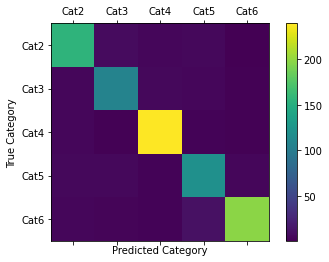

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       176
           1       0.84      0.86      0.85       125
           2       0.93      0.95      0.94       251
           3       0.82      0.86      0.84       140
           4       0.95      0.89      0.92       222

    accuracy                           0.90       914
   macro avg       0.89      0.89      0.89       914
weighted avg       0.90      0.90      0.90       914

Confusion matrix
 [[156   8   5   6   1]
 [  5 107   6   5   2]
 [  5   2 239   3   2]
 [  6   6   3 120   5]
 [  5   4   3  12 198]] 
---------------------------------



In [24]:
y_true = true_labels
y_pred = pred_labels
labels_cat = ['Cat2', 'Cat3' , 'Cat4' , 'Cat5' , 'Cat6']
cm = confusion_matrix(y_true, y_pred)

print('Confusion matrix\n', cm, '\n---------------------------------\n')


fig = plt.figure() 
ax = fig.add_subplot(111) 
cax = ax.matshow(cm) 
#plt.title('Confusion matrix of the classifier') 
fig.colorbar(cax) 
ax.set_xticklabels([''] + labels_cat) 
ax.set_yticklabels([''] + labels_cat) 
plt.xlabel('Predicted Category') 
plt.ylabel('True Category') 
plt.show()



#plt.matshow(cm)
#plt.colorbar()
#plt.show()

print(classification_report(y_true, y_pred))
print('Confusion matrix\n', confusion_matrix(y_true, y_pred), '\n---------------------------------\n')

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

In [25]:
cm=confusion_matrix(y_true,y_pred)
tp=np.diag(cm)
tp

array([156, 107, 239, 120, 198])

In [26]:
fp = np.sum(cm, axis=0) - tp
fp

array([21, 20, 17, 26, 10])

In [27]:
fn = np.sum(cm, axis=1) - tp
fn

array([20, 18, 12, 20, 24])

In [28]:
num_classes = 5
tn = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    tn.append(sum(sum(temp)))
tn

[717, 769, 646, 748, 682]

In [29]:
# REF: 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
# https://towardsdatascience.com/evaluating-categorical-models-ii-sensitivity-and-specificity-e181e573cff8

# recall of the positive class is also known as “sensitivity”: is the metric that evaluates a model’s ability to predict true positives of each available category
sensitivity = tp / (tp + fn)
#recall of the negative class is “specificity”:  the metric that evaluates a model’s ability to predict true negatives of each available category
specificity = tn / (tn + fp)
print(f'Sensitivity: {sensitivity} - Specificity: {specificity}')

Sensitivity: [0.88636364 0.856      0.95219124 0.85714286 0.89189189] - Specificity: [0.97154472 0.97465146 0.97435897 0.96640827 0.98554913]


In [30]:
# PPV, NPV 
# REF: https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
ppv = tp / (tp + fp)
npv = tn / (tn + fn)
print(f'PPV: {ppv} - NPV: {npv}')

PPV: [0.88135593 0.84251969 0.93359375 0.82191781 0.95192308] - NPV: [0.97286296 0.97712834 0.98176292 0.97395833 0.96600567]


In [31]:
torch.save(model_metadata['model'], '/home/mega/Desktop/Data2/Datasets/Thyroid_Dataset/Efficient_bo_Two_Atten_Parallel.pt')